## Mouse: M044

Session: M044_2024_12_04_09_30

In [215]:
# imports
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

import pandas as pd
import numpy as np
import random
from statistics import mode
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import mat73
from IPython.display import display, Markdown

import pyaldata as pyal
import pylab
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from tools.curbd import curbd
import pylab
import importlib

from tools.dsp.preprocessing import preprocess
from tools.rnn_and_curbd.RNN_functions import *

np.random.seed(44)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### For running on server

In [ ]:
data_dir = "/data/bnd-data/raw/M044/M044_2024_12_04_09_30"
mat_file = "M044_2024_12_04_09_30_pyaldata.mat"

#### For running locally

In [2]:
data_dir = "/Users/zosiasus/Documents/M044/"
mat_file = "M044_2024_12_04_09_30_pyaldata.mat"

In [3]:
fname = os.path.join(data_dir, mat_file)

df = pyal.mat2dataframe(fname, shift_idx_fields=True)
mouse = mat_file.split('_')[0]

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.


#### Preprocessing

In [ ]:
df_ = preprocess(df, only_trials = False)
df_ = pyal.select_trials(df_, "idx_trial_end > 30365")  # Remove first 5 minutes because the switch was off

#### Selecting only small fraction to minimize running time

In [15]:
df_ = df_[:50]

#### Selecting brain regions

In [36]:
# Separate columns of 'all_spikes' to M1 and Dls (dorsolateral striatum)
brain_areas = ["Dls_rates", "M1_rates"]
df_["M1_rates"] = [df_["all_rates"][i][:,300:] for i in range(len(df_))]
df_["Dls_rates"] = [df_["all_rates"][i][:,0:300] for i in range(len(df_))]
for region in brain_areas:
    print(f"Neurons in {region.split('_')[0]}: {df_[region][0].shape[1]}")

Neurons in Dls: 300
Neurons in M1: 174


In [17]:
df_.head()

animal                session  trial_id  trial_name  trial_length  bin_size  \
0   M044  M044_2024_12_04_09_30        82       trial           401      0.03   
1   M044  M044_2024_12_04_09_30        83  intertrial           101      0.03   
2   M044  M044_2024_12_04_09_30        84       trial           401      0.03   
3   M044  M044_2024_12_04_09_30        85  intertrial           301      0.03   
4   M044  M044_2024_12_04_09_30        86       trial           401      0.03   

   idx_trial_start  idx_trial_end idx_CPI values_before_camera_trigger  ...  \
0            30233          30366      []                           []  ...   
1            30366          30399      []                           []  ...   
2            30399          30533      []                           []  ...   
3            30533          30633      []                           []  ...   
4            30633          30766      []                           []  ...   

  idx_session_timer                                      all_chan_best  \
0                []  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
1                []  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
2                []  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
3                []  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
4                []  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   

                                      all_unit_guide  \
0  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
1  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
2  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
3  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   
4  [[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...   

                                         all_KSLabel  \
0  [good, mua, good, mua, good, good, good, good,...   
1  [good, mua, good, mua, good, good, good, good,...   
2  [good, mua, good, mua, good, good, good, good,...   
3  [good, mua, good, mua, good, good, good, good,...   
4  [good, mua, good, mua, good, good, good, good,...   

                                          all_spikes  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3  [[1.4142135623730951, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                           all_rates sol_level_id  \
0  [[0.0, 0.0, 0.0, 2.798774, 0.0, 0.91412437, 0....          1.0   
1  [[0.003973114, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...          NaN   
2  [[0.0, 0.003973114, 0.0, 0.0, 0.0, 0.91444397,...          1.0   
3  [[37.301525, 0.0, 0.0, 0.0, 0.00031967516, 6.2...          NaN   
4  [[25.524176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000319...          0.0   

  sol_contra_ipsi                                           M1_rates  \
0             1.0  [[0.003973114, 0.0, 0.0, 0.0, 0.0, 6.201384, 1...   
1             NaN  [[0.0, 0.0, 0.00031967516, 0.0, 0.0, 0.0, 6.20...   
2             1.0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.21812, 0.00...   
3             NaN  [[2.798774, 0.0, 0.0, 12.949476, 0.0, 12.98424...   
4             1.0  [[0.21239205, 0.0, 0.0, 0.0, 0.0, 0.0, 1.12651...   

                                           Dls_rates  
0  [[0.0, 0.0, 0.0, 2.798774, 0.0, 0.91412437, 0....  
1  [[0.003973114, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  
2  [[0.0, 0.003973114, 0.0, 0.0, 0.0, 0.91444397,...  
3  [[37.301525, 0.0, 0.0, 0.0, 0.00031967516, 6.2...  
4  [[25.524176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000319...  

[5 rows x 28 columns]

#### Update trial length column

In [165]:
df_['trial_length'] = df_['all_rates'].apply(lambda x: x.shape[0])

#### Variables

In [114]:
# perturbation time
perturbation_time = df_.idx_sol_on[0]
perturbation_time_seconds = perturbation_time * df_.bin_size[0]

# trial length
trial_len = mode(df_.trial_length) # this is kinda a crude way to do it but it works
print(f"length of trial: {trial_len}")

# number of rows
num_segments = len(df_)
print(f"Number of segments: {num_segments}")

# number of trials
num_trials = (df_.trial_length == trial_len).sum()
print(f"Number of trials: {num_trials}")

# number of inter-trials
num_inter = (df_.trial_length != trial_len).sum()
print(f"Number of trials: {num_inter}")


length of trial: 133
Number of segments: 50
Number of trials: 25
Number of trials: 25


#### Concatenate trials and inter-trials in time

In [19]:
concat_trials = pyal.concat_trials(df_, signal = "all_rates")

#### Plot RNN input

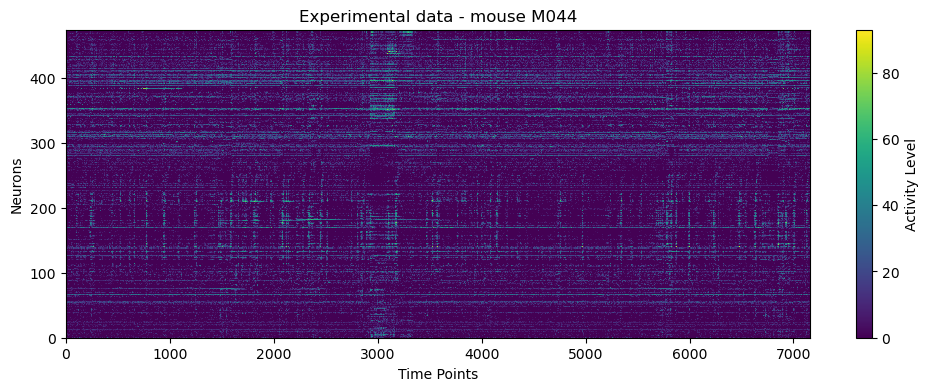

In [31]:
fig = plot_neuron_activity(concat_trials, "Experimental data", mouse)

### RNN training

In [22]:
activity = np.transpose(concat_trials)
regions = get_regions(df_, brain_areas)

In [23]:
rnn_model = curbd.trainMultiRegionRNN(activity,
                                  dtData=df.bin_size[0],
                                  dtFactor=4,
                                  tauRNN = 0.3,
                                  ampInWN= 0.001,
                                  g = 1.5,
                                  regions=regions,
                                  verbose=True,
                                  plotStatus=False,
                                  nRunFree=5,
                                  nRunTrain=100)

trial=0 pVar=0.328193 chi2=39.537488
trial=1 pVar=0.392004 chi2=36.289644
trial=2 pVar=0.371313 chi2=37.542871
trial=3 pVar=0.364615 chi2=37.959074
trial=4 pVar=0.367673 chi2=37.779996
trial=5 pVar=0.346200 chi2=39.070067
trial=6 pVar=0.376835 chi2=37.227091
trial=7 pVar=0.357034 chi2=38.421393
trial=8 pVar=0.374638 chi2=37.365550
trial=9 pVar=0.372589 chi2=37.482861
trial=10 pVar=0.359760 chi2=38.240126
trial=11 pVar=0.367881 chi2=37.764103
trial=12 pVar=0.372833 chi2=37.474059
trial=13 pVar=0.365852 chi2=37.885388
trial=14 pVar=0.362304 chi2=38.097426
trial=15 pVar=0.358175 chi2=38.331988
trial=16 pVar=0.364866 chi2=37.933649
trial=17 pVar=0.378898 chi2=37.096850
trial=18 pVar=0.380982 chi2=36.956296
trial=19 pVar=0.374881 chi2=37.324610
trial=20 pVar=0.389330 chi2=36.464583
trial=21 pVar=0.385205 chi2=36.713984
trial=22 pVar=0.395531 chi2=36.089481
trial=23 pVar=0.383702 chi2=36.804760
trial=24 pVar=0.398810 chi2=35.885604
trial=25 pVar=0.392241 chi2=36.281521
trial=26 pVar=0.395487

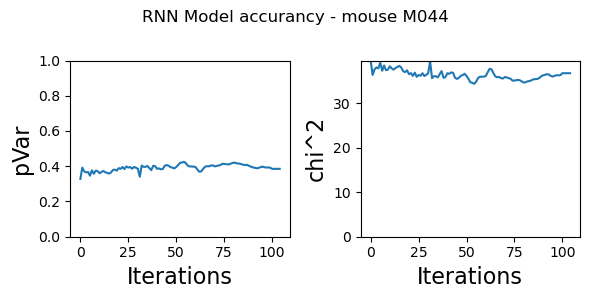

In [24]:
accuracy_fig = plot_model_accuracy(rnn_model, mouse)

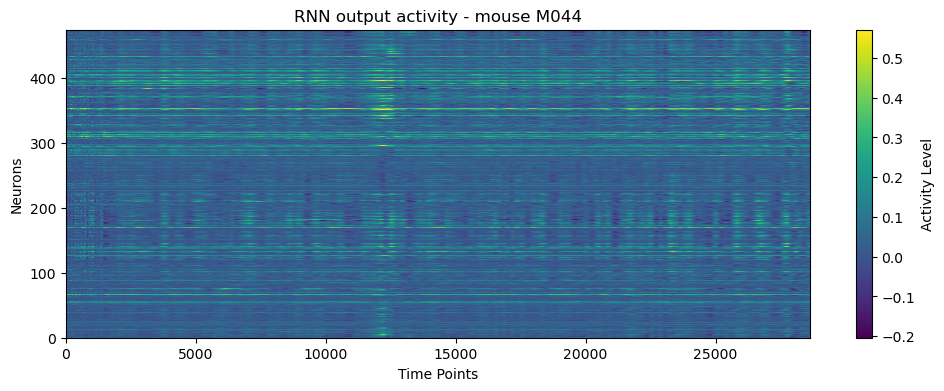

In [70]:
rnn_fig = plot_neuron_activity(rnn_model['RNN'].T, "RNN output activity", mouse)

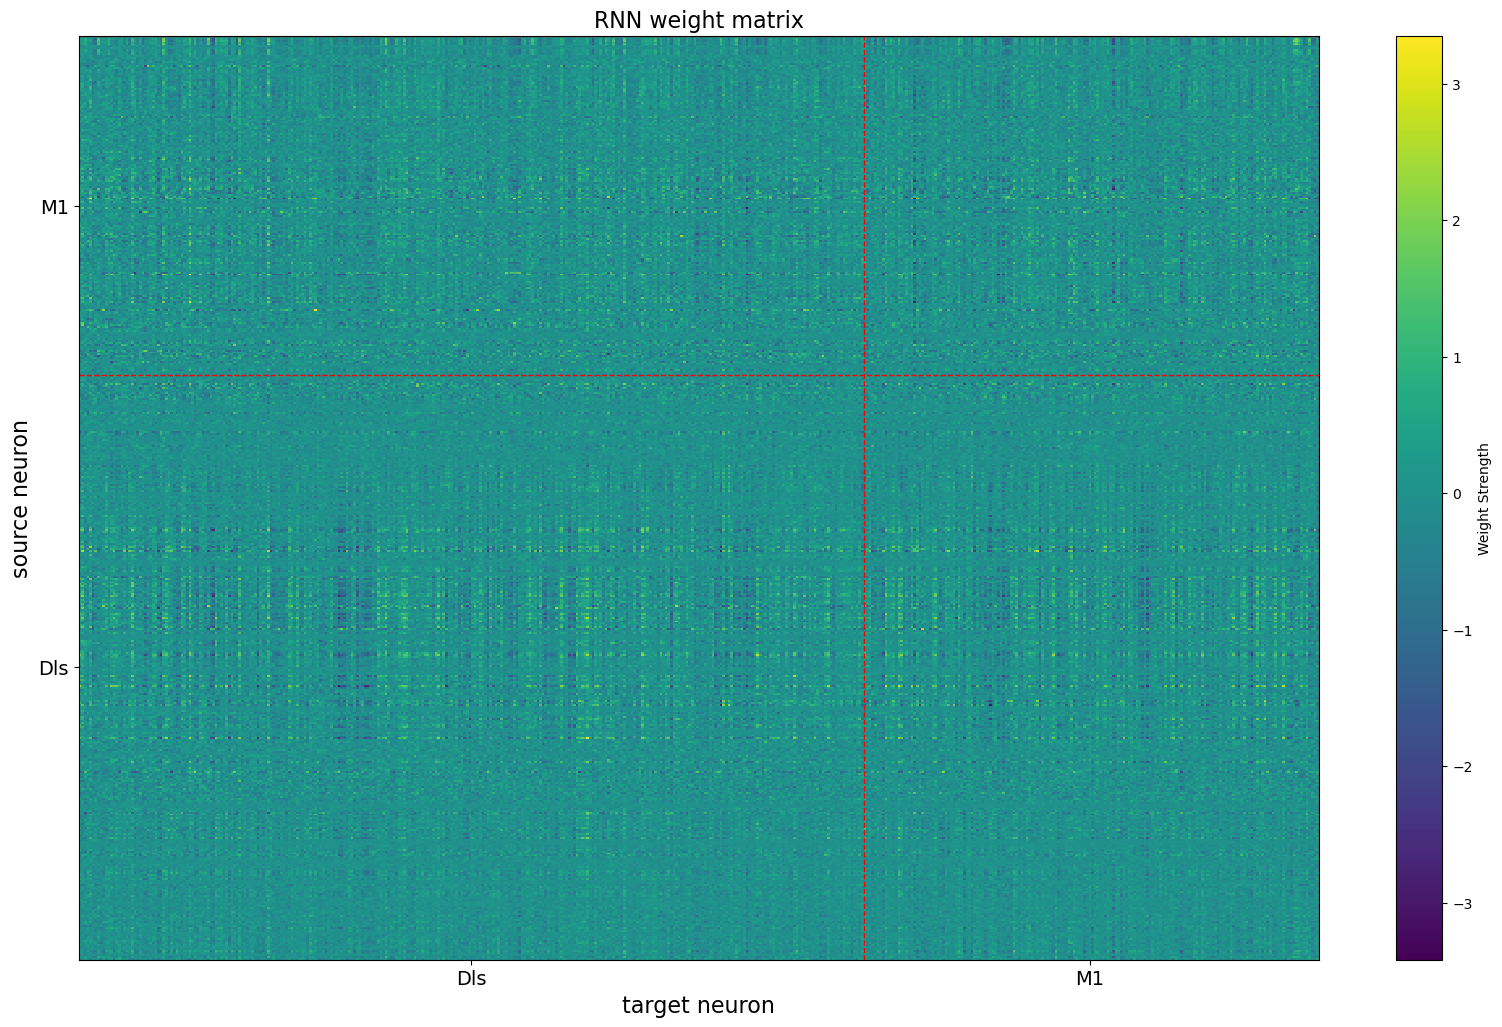

In [35]:
matrix_fig = plot_rnn_weight_matrix(rnn_model, regions)

#### PCA of RNN model

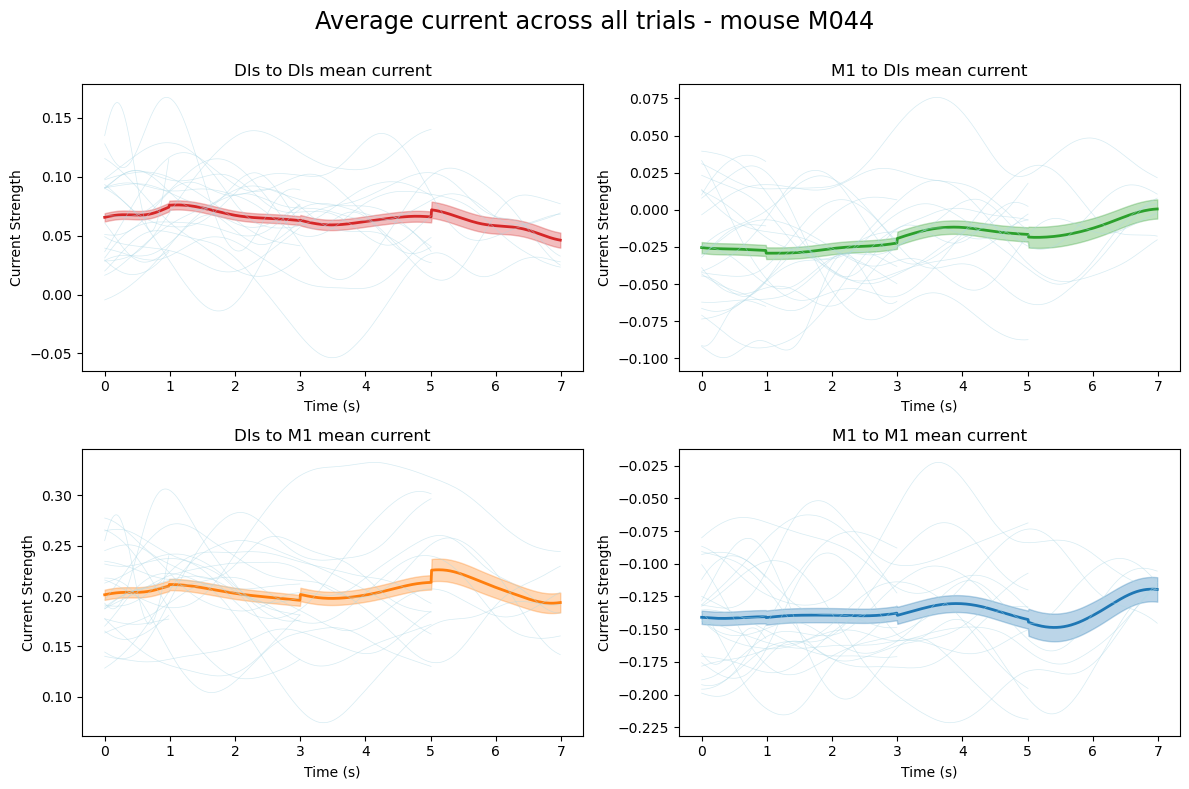

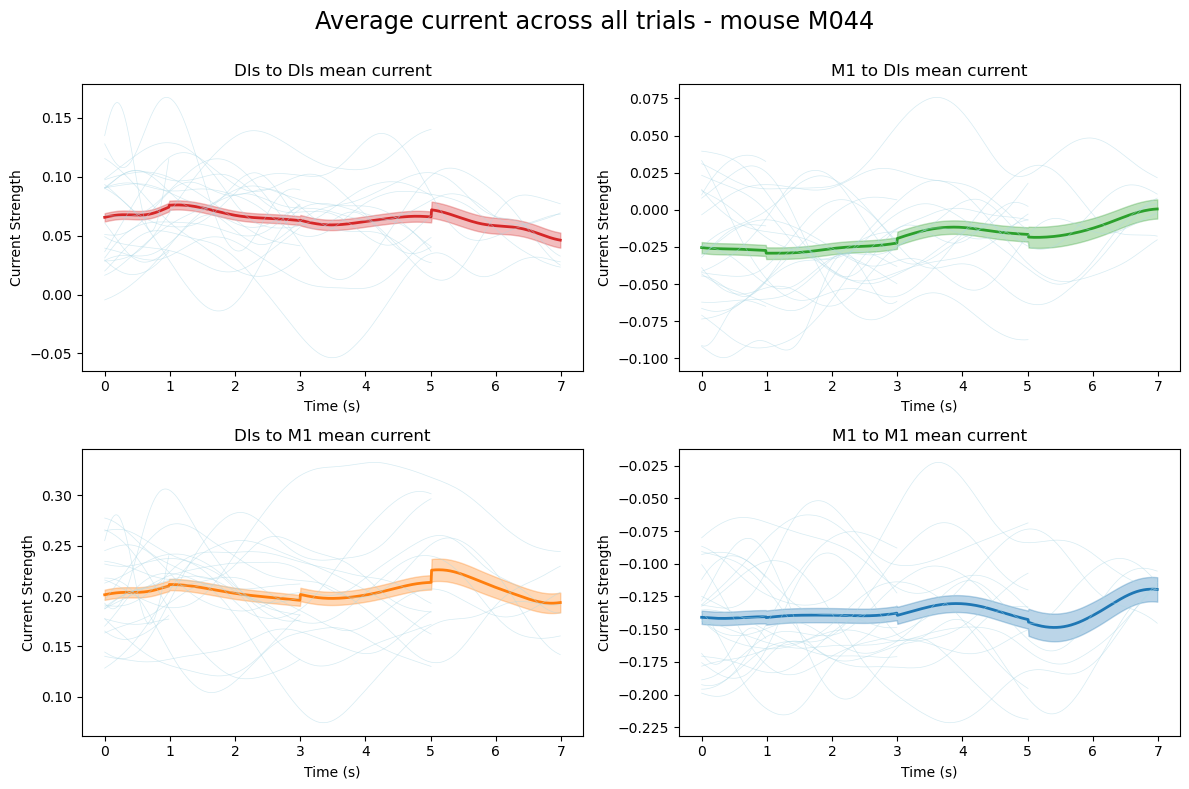

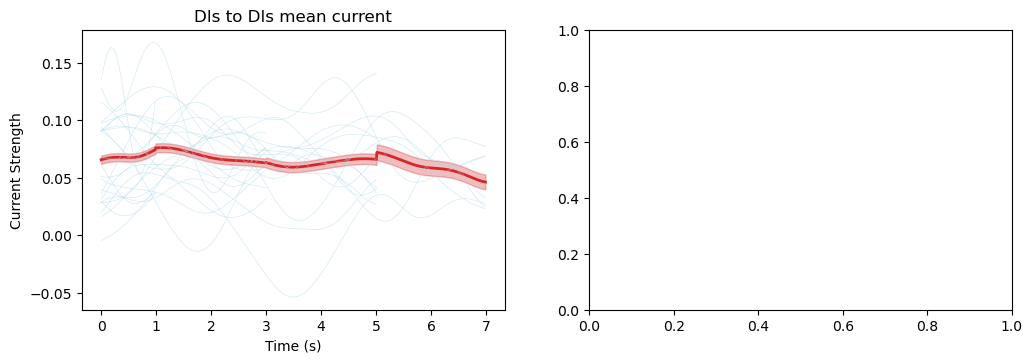

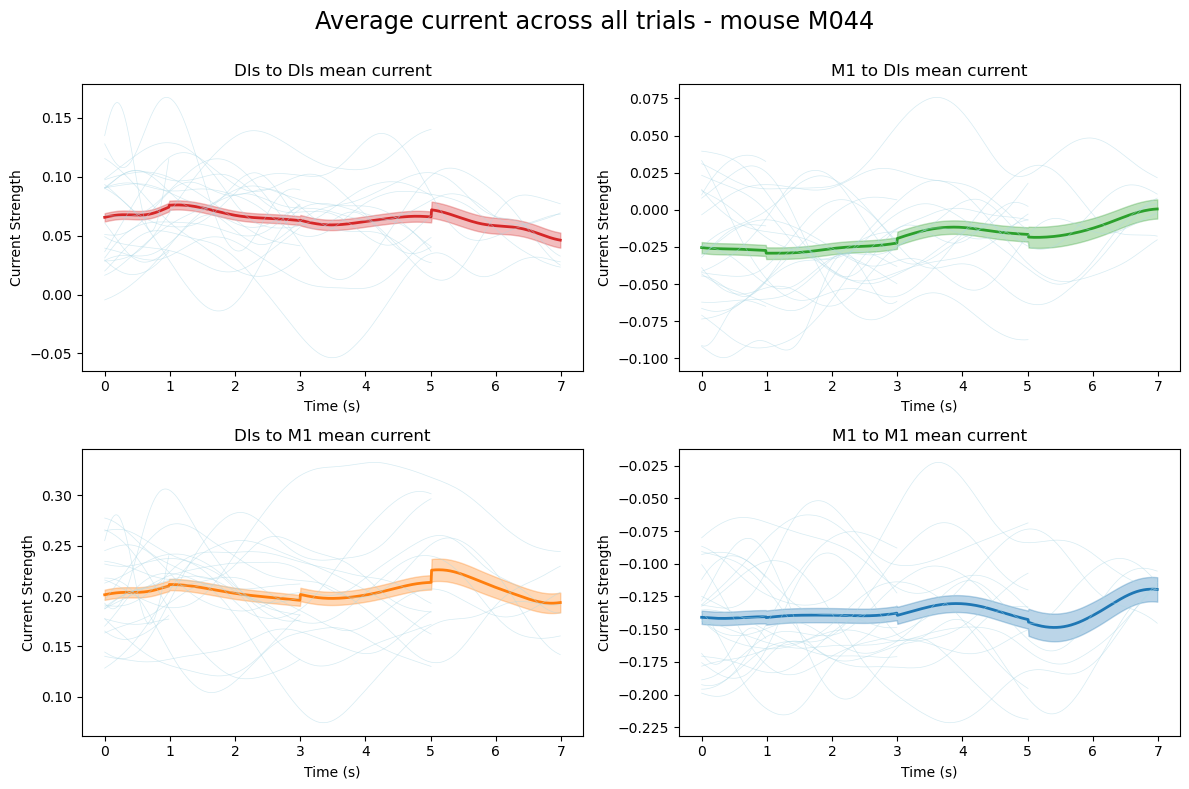

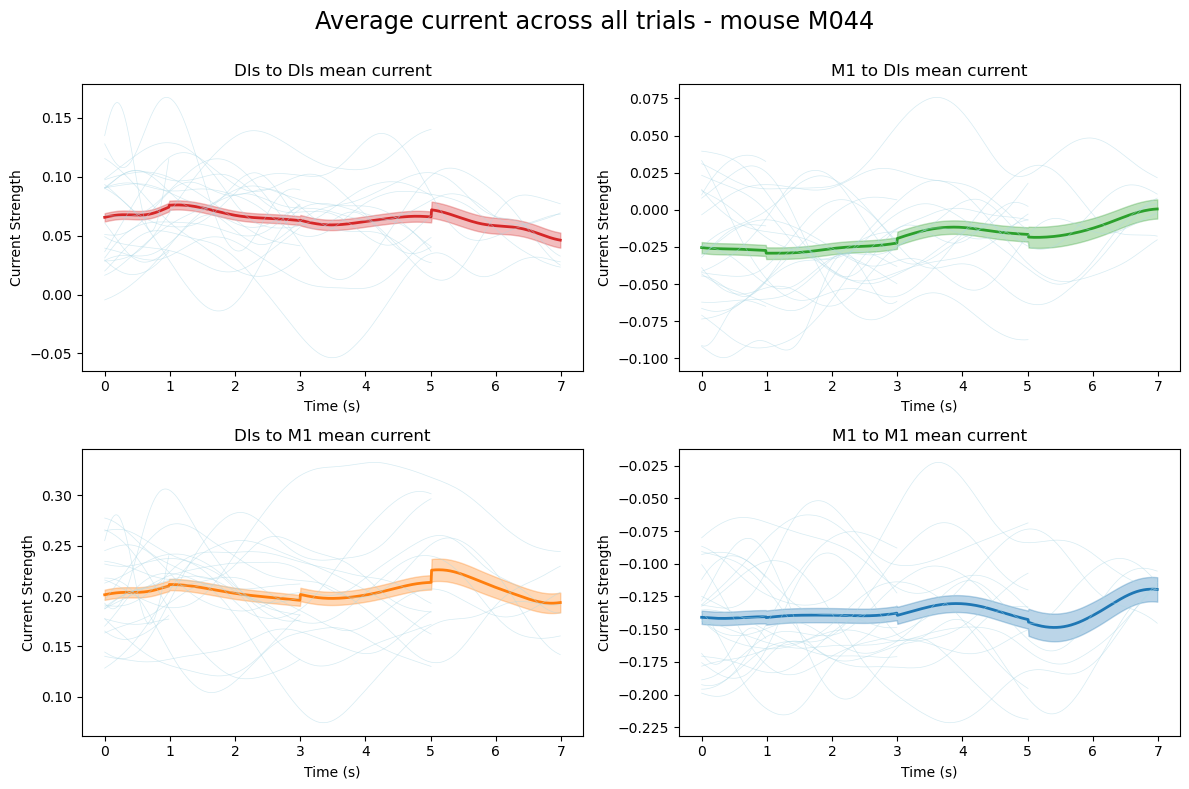

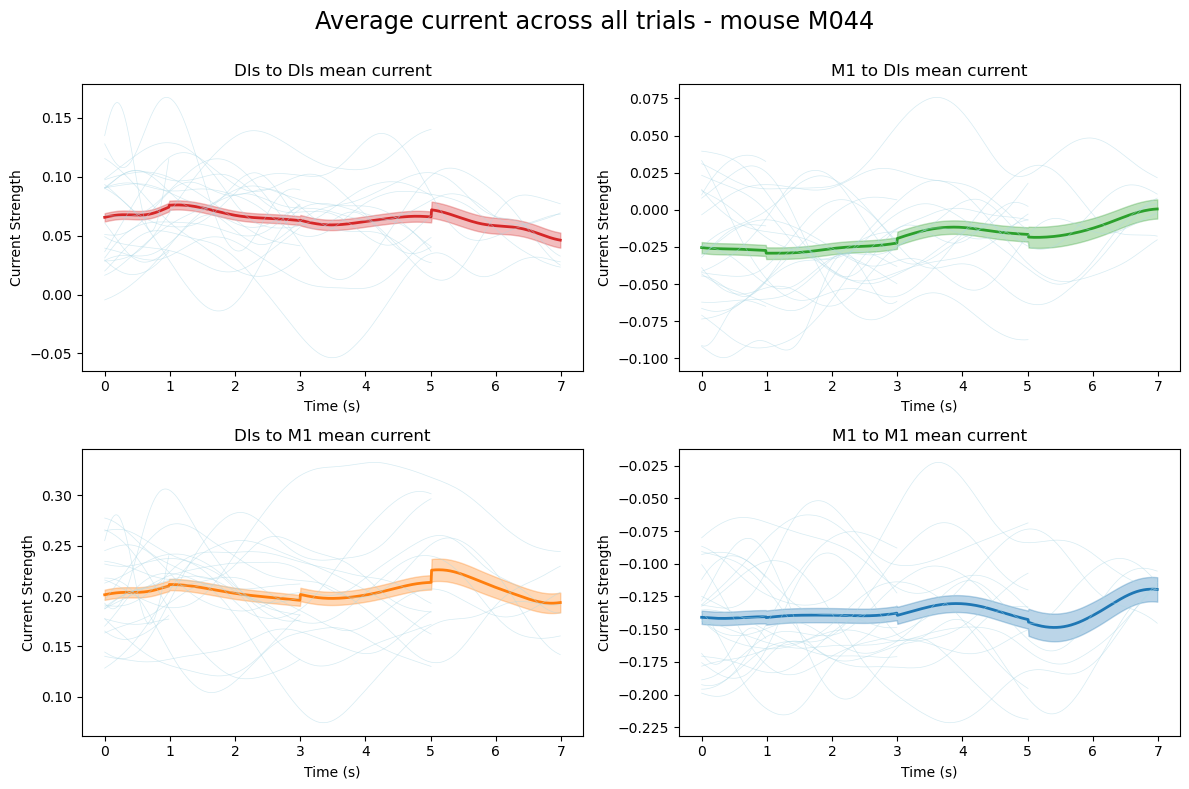

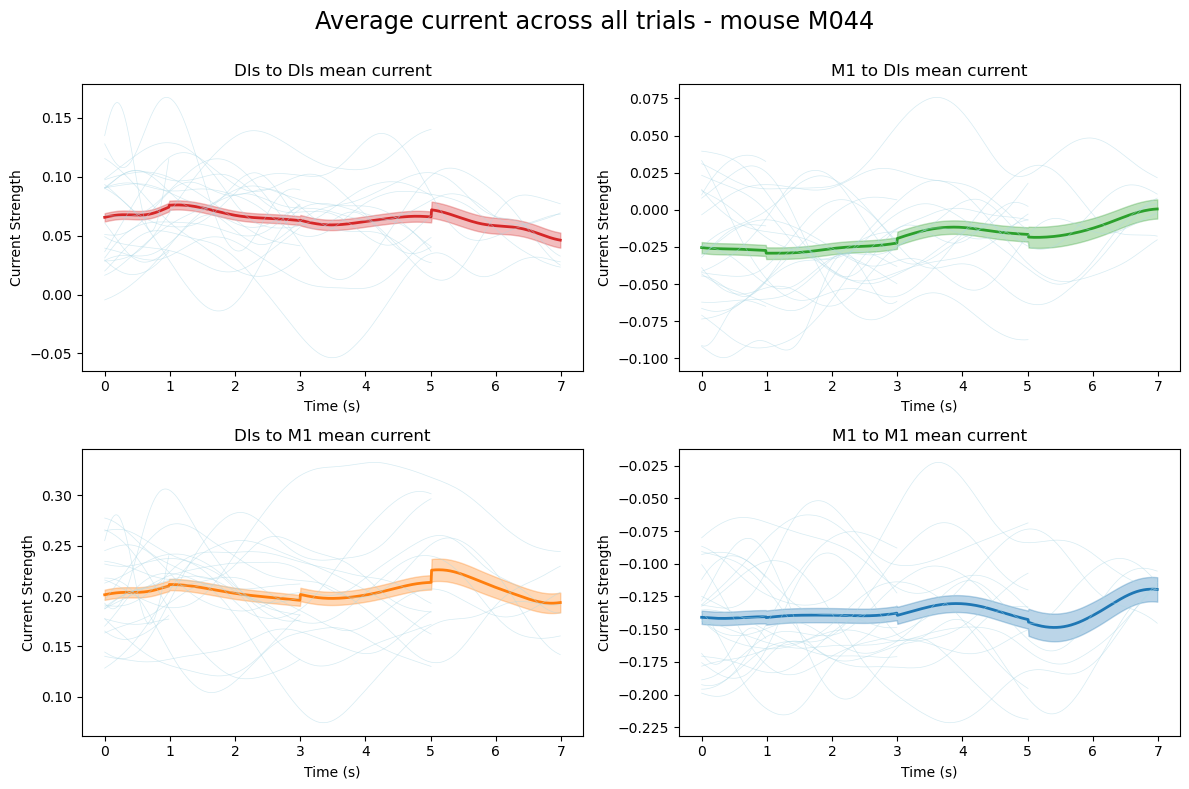

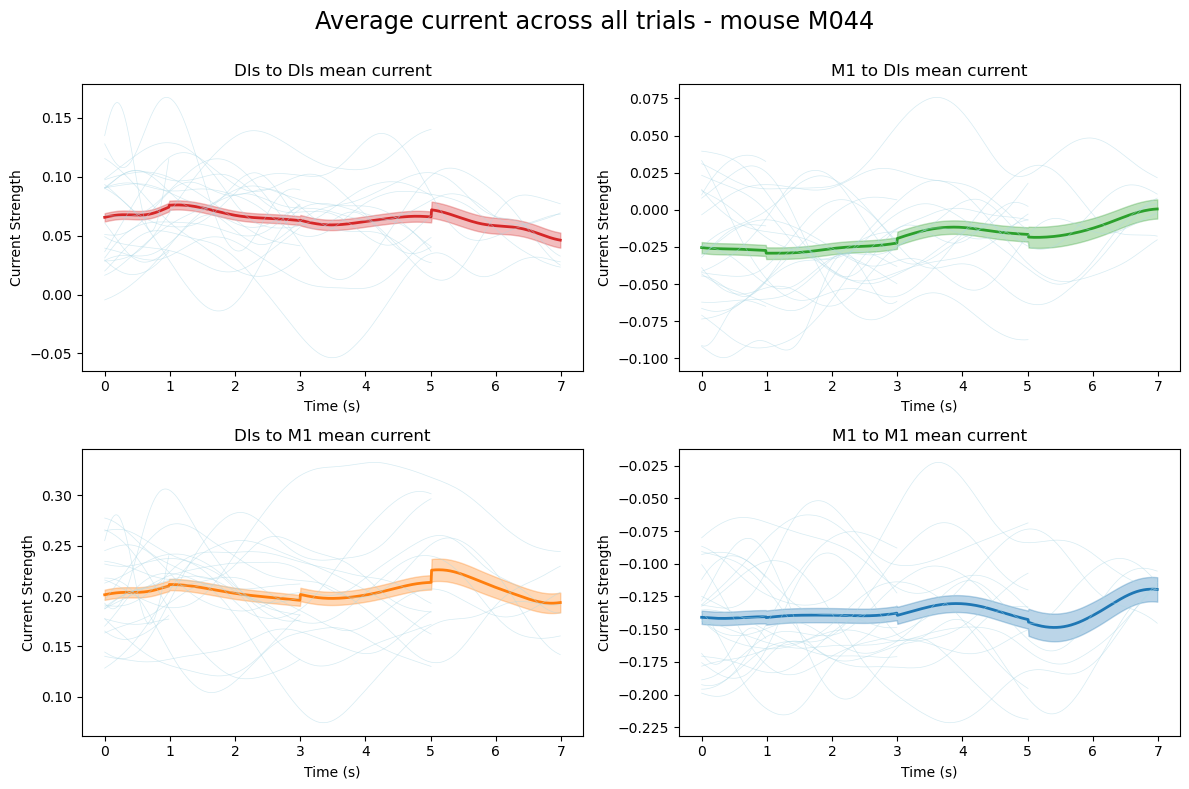

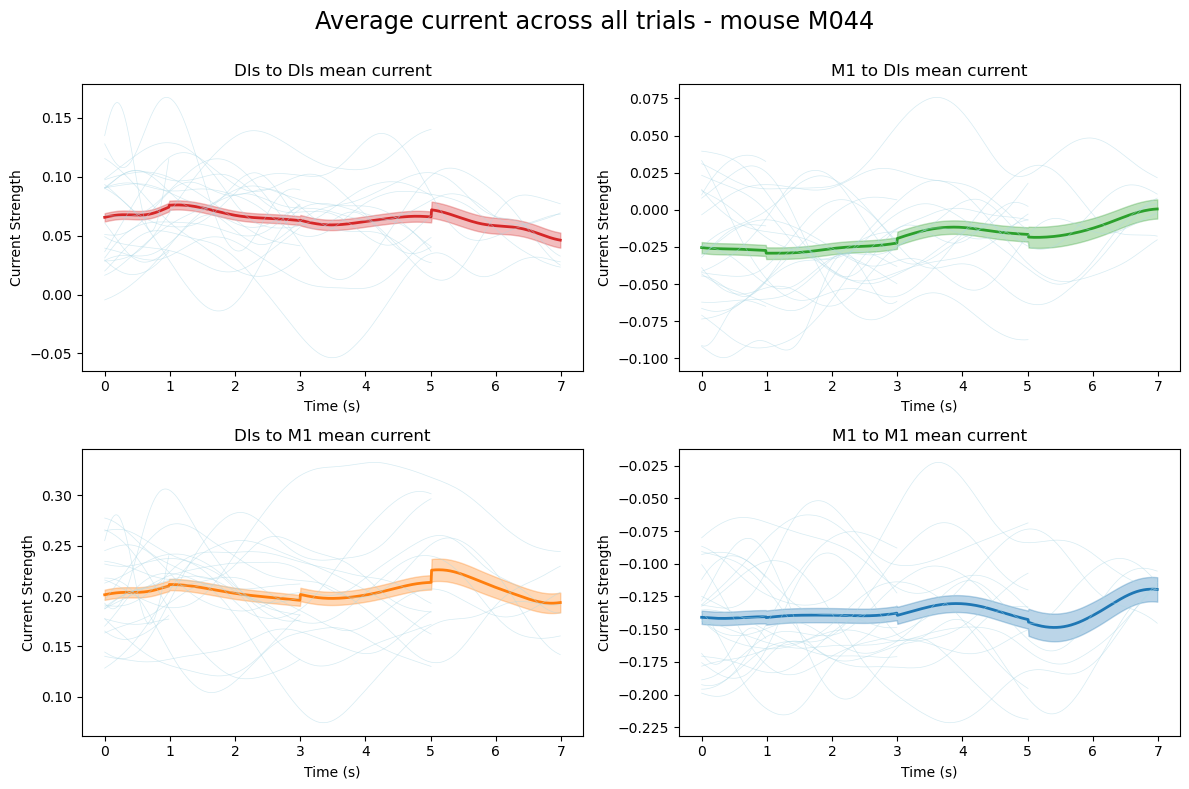

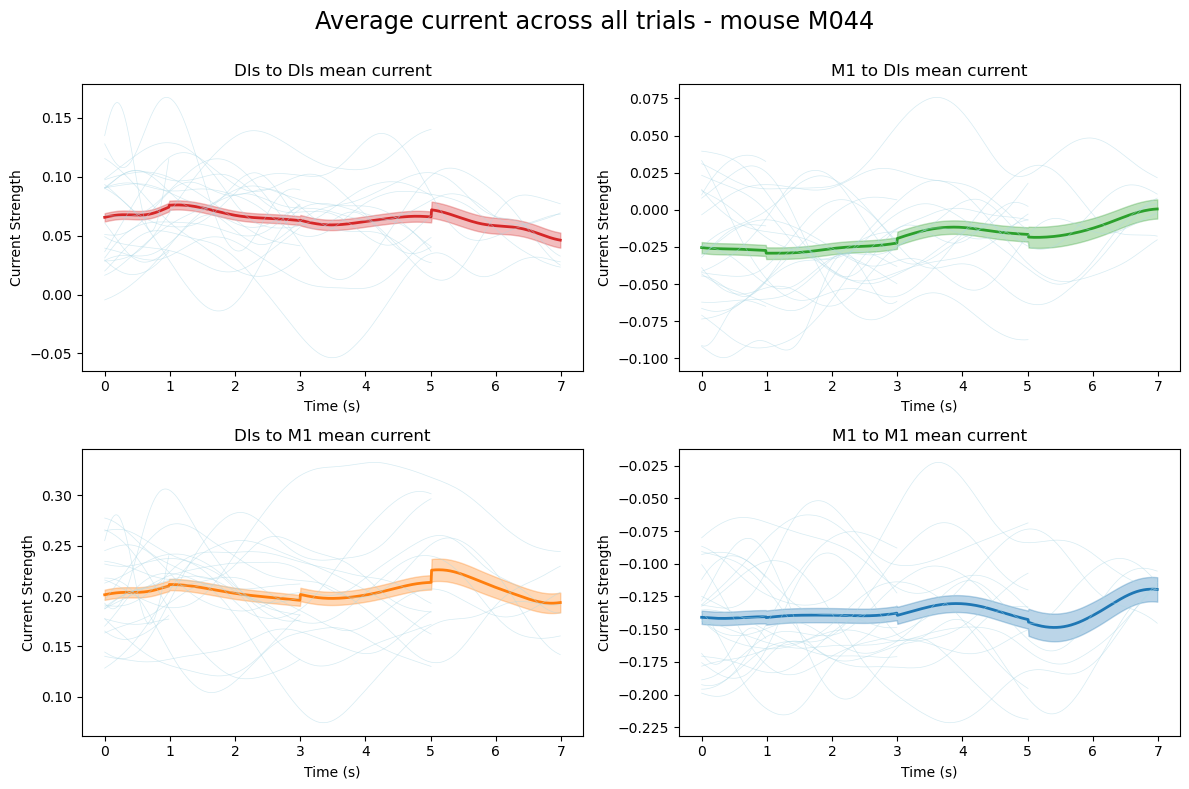

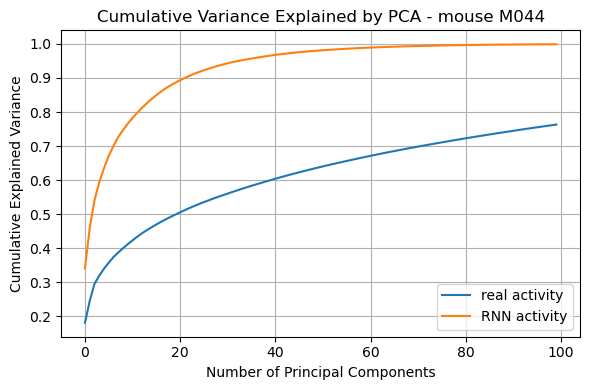

ValueError: Found input variables with inconsistent numbers of samples: [7158, 28629]

In [217]:
data_rnn = rnn_model['RNN'].T
data_real = rescale_array(concat_trials)

# PCA
pca_real, pca_data_real = PCA_fit_transform(data_real, 100)
pca_rnn, pca_data_rnn = PCA_fit_transform(data_rnn, 100)

variance_figure = plot_PCA_cum_var(pca_real, pca_rnn, mouse)
# PCA_figure = plot_PCA(pca_data_real, pca_data_rnn, len(df_), mouse)

# CCA
canonical_values, scores = CCA_compare(pca_data_real, pca_data_rnn, 100)
canonical_values = np.array(canonical_values)


print(f"CCA score of real data and RNN data aligment: {scores[0]}")
print(f"CCA score for control on real data: {scores[1]}")
print(f"CCA score for control on rnn data: {scores[2]}")


### CURBD

In [25]:
curbd_arr, curbd_labels = curbd.computeCURBD(rnn_model)
n_regions = curbd_arr.shape[0]

#### Plot currents 

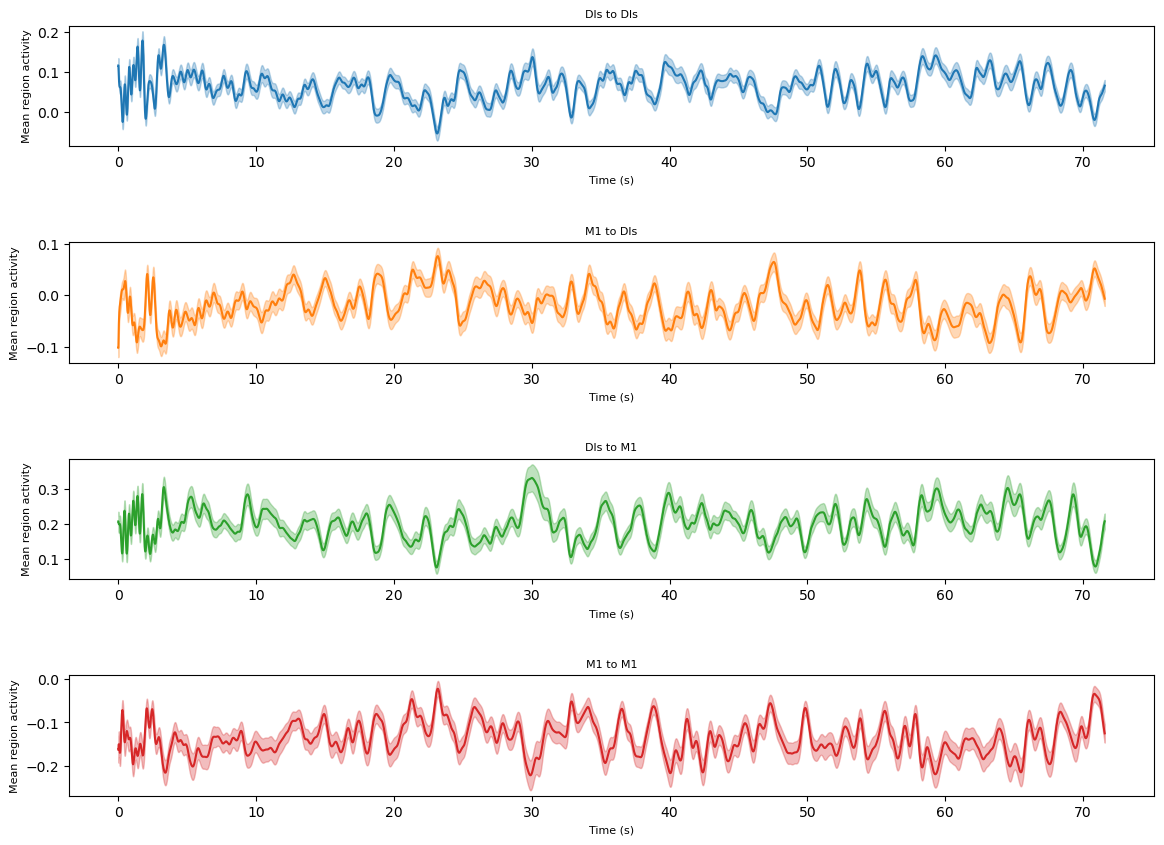

In [48]:
curbd_fig = pylab.figure(figsize=[14, 10])
count = 1
colors = ['C0', 'C1', 'C2', 'C3']

for iTarget in range(n_regions):
    for iSource in range(n_regions):
        axn = curbd_fig.add_subplot(n_regions*n_regions, 1, count)
        count += 1
        color = colors[(count - 2) % len(colors)]

        data = curbd_arr[iTarget, iSource]
        mean_activity = data.mean(axis=0)
        sem_activity = data.std(axis=0) / np.sqrt(data.shape[0])

        axn.plot(rnn_model['tRNN'], mean_activity, color=color)

        axn.fill_between(rnn_model['tRNN'],
                         mean_activity - sem_activity,
                         mean_activity + sem_activity,
                         color=color, alpha=0.3)

        axn.set_xlabel('Time (s)')
        axn.set_ylabel('Mean region activity')
        axn.set_title(curbd_labels[iTarget, iSource])
        axn.title.set_fontsize(8)
        axn.xaxis.label.set_fontsize(8)
        axn.yaxis.label.set_fontsize(8)

curbd_fig.subplots_adjust(hspace=0.8)

#### Get only current during trials

In [115]:
reset_points = get_reset_points_continuous(df_, dtFactor=4)
trial_len_rnn = trial_len * 4
print(reset_points)
print(trial_len_rnn)

[0, 532, 664, 1196, 1596, 2128, 2796, 3328, 3460, 3992, 4660, 5192, 5592, 6124, 7056, 7588, 8256, 8788, 9720, 10252, 10920, 11452, 12384, 12916, 13584, 14116, 14784, 15316, 15716, 16248, 17180, 17712, 18644, 19176, 19576, 20108, 21040, 21572, 22504, 23036, 23704, 24236, 24636, 25168, 25836, 26368, 26500, 27032, 27432, 27964]
532


In [99]:
all_currents, all_current_labels = format_for_plotting(curbd_arr, curbd_labels, n_regions, reset_points)

In [137]:
trial_currents = []
inter_trial_currents = []

for region in all_currents:
    region_trial = []
    region_inter = []
    for neuron in region:
        neuron_trial = []
        neuron_inter = []
        for trial in neuron:
            if len(trial) == trial_len_rnn:
                neuron_trial.append(trial)
            else:
                neuron_inter.append(trial)
        region_trial.append(neuron_trial)
        region_inter.append(neuron_inter)
    trial_currents.append(region_trial)
    inter_trial_currents.append(region_inter)

/Users/zosiasus/Documents/earthquake_shared/tools/rnn_and_curbd/RNN_functions.py:573: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  


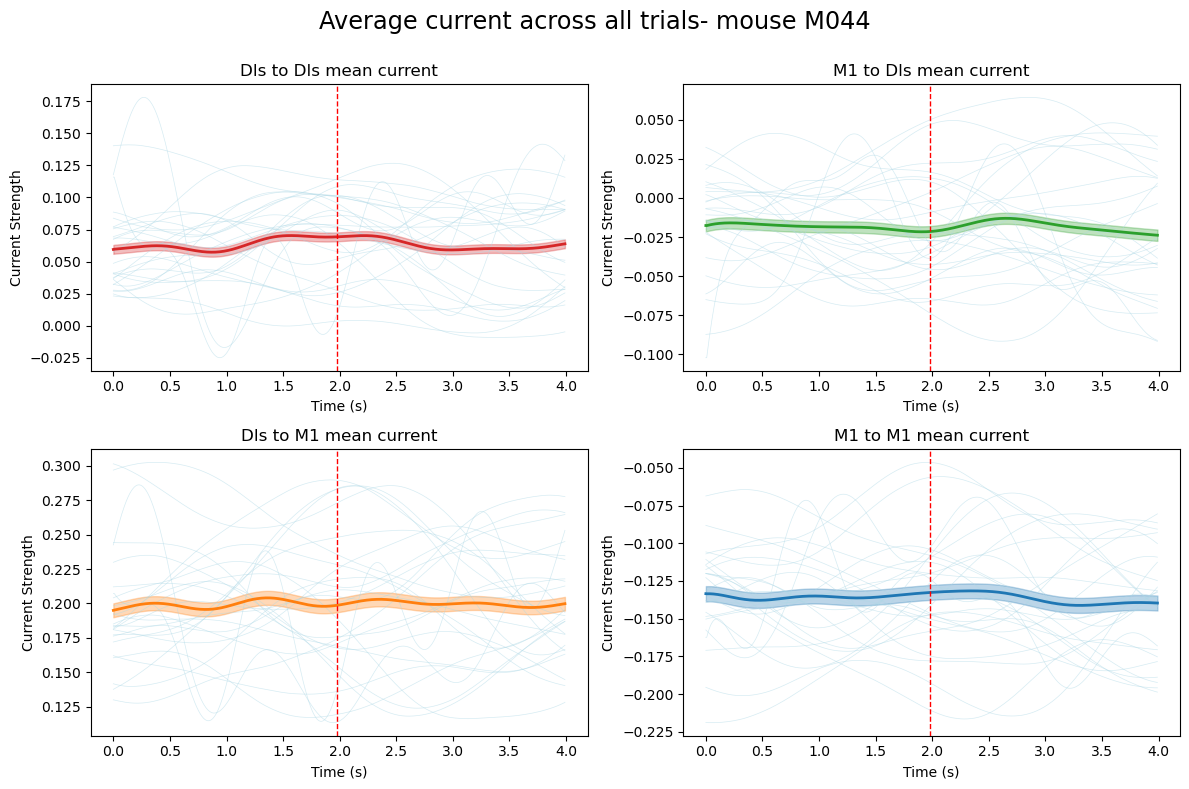

In [147]:
currents_fig = plot_all_currents_seperate(trial_currents, all_current_labels, perturbation_time_seconds, df_.bin_size[0], dtFactor=4, mouse_num=mouse)

In [221]:
inter_currents_fig = plot_inter_trial_currents(inter_trial_currents, all_current_labels, df_.bin_size[0], dtFactor=4, mouse_num=mouse)

/Users/zosiasus/Documents/earthquake_shared/tools/rnn_and_curbd/RNN_functions.py:629: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/dx/rxyhq6ns3zg19nylykcr_c940000gn/T/ipykernel_2744/1841921271.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  inter_currents_fig.show()


#### PCA of currents